In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  

In [2]:
df = pd.read_csv(r"C:\Users\HARSHITH\Downloads\pemfc_preprocessed_data.csv")
df.head()

,I,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode,V
0,-0.886787,-1.027522,-0.806638,-1.261444,-1.873236,-1.227992,-2.493136,-1.875273,491.114619
1,-0.886787,-1.027522,-0.806638,-1.261444,-1.872990,-1.227992,-2.493136,-1.875273,491.114619
2,-0.886787,-1.027522,-0.806638,-1.261444,-1.872671,-1.227991,-2.493136,-1.875273,491.114619
3,-0.886787,-1.027522,-0.806638,-1.261444,-1.870597,-1.227988,-2.493136,-1.875273,491.114619
4,-0.886787,-1.027522,-0.806638,-1.261444,-1.867493,-1.227981,-2.493136,-1.875273,491.114619


In [3]:
# drop all missing values if they exist
df.dropna(inplace=True)

In [4]:
features = ['I', 'T', 'Hydrogen', 'Oxygen', 'RH anode', 'Rh Cathode']
X = df[features]
y = df['V'] 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test_scaled)

In [9]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Model Performance:
Mean Squared Error (MSE): 248.89
R² Score: 0.930


In [10]:
print("\nModel Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Model Coefficients:
I: -77.949
T: -13.796
Hydrogen: 11.014
Oxygen: 17.351
RH anode: -4.194
Rh Cathode: -1.000
Intercept: 415.425


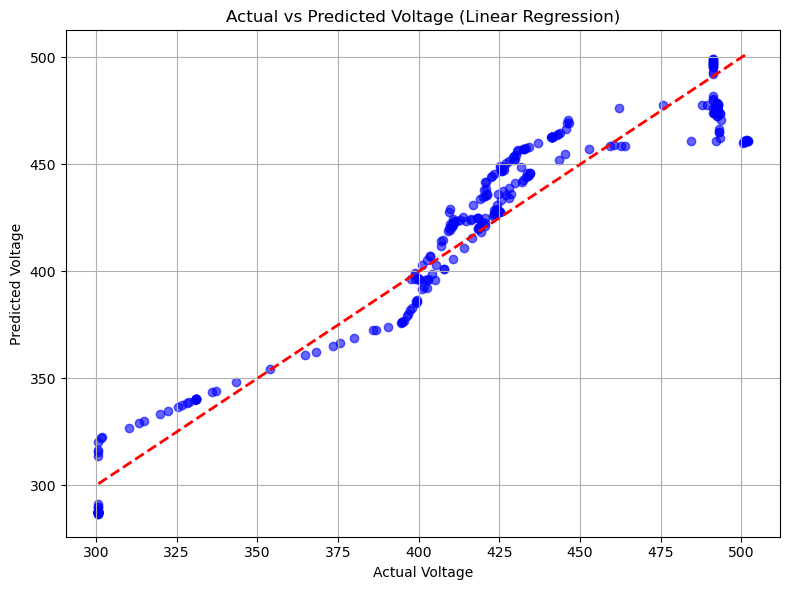

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Voltage')
plt.ylabel('Predicted Voltage')
plt.title('Actual vs Predicted Voltage (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
joblib.dump(model, "../models/linear_model2.pkl")
# joblib.dump(scaler, "../models/scaler_pemfc.pkl")

['../models/linear_model2.pkl']